## **Analysis**

# **Data Preparation**



Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



Loading Stock Data


In [2]:
msft_data = pd.read_csv('MSFT.csv')
aapl_data = pd.read_csv('AAPL.csv')
tsla_data = pd.read_csv('TSLA.csv')
meta_data = pd.read_csv('META.csv')

In [3]:
company_data = {'MSFT': msft_data,'AAPL': aapl_data,'TSLA': tsla_data,'META': meta_data}


Categorizing COVID-19 Periods and convert date to datetime format

In [4]:
before_covid = '2017-1-31'
during_covid_start = '2020-03-01'
during_covid_end = '2021-06-30'


In [5]:
for company, data in company_data.items():
    data['Date'] = pd.to_datetime(data['Date'])
    data['COVID_Category'] = pd.cut(data['Date'],
        bins=[pd.to_datetime(before_covid), pd.to_datetime(during_covid_start), pd.to_datetime(during_covid_end), pd.to_datetime(data['Date'].max())],
        labels=['Before COVID', 'During COVID', 'After COVID'])


# **Data Analysis**


Visualization of stock price data for four companies during different COVID-19 periods.

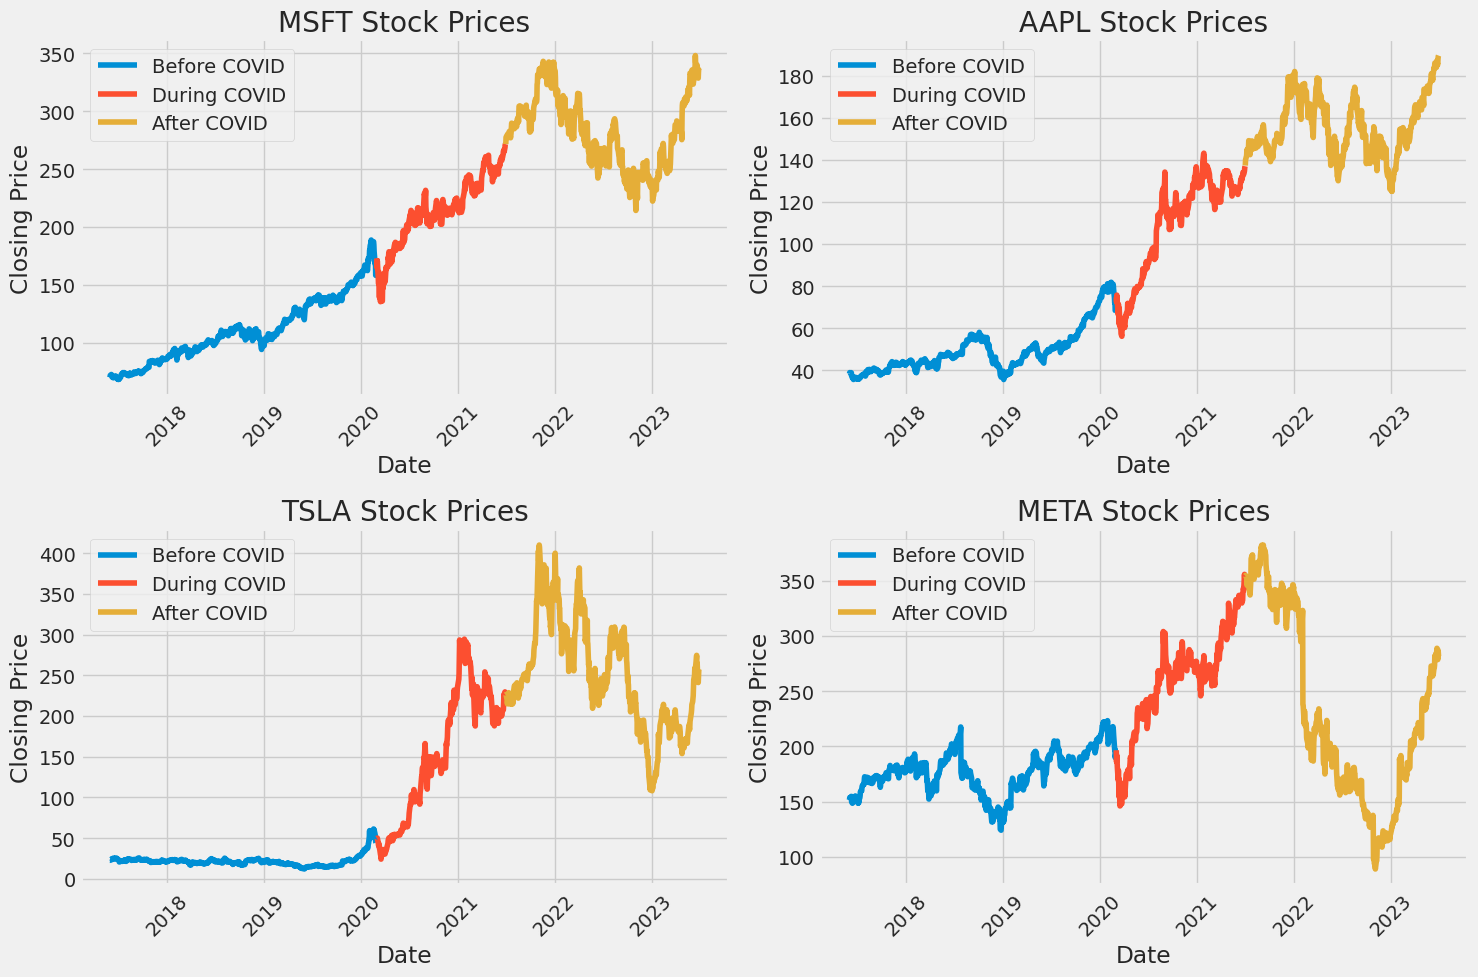

In [6]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()
for idx, (company, data) in enumerate(company_data.items()):
    ax = axs[idx]

    for category in ['Before COVID', 'During COVID', 'After COVID']:
        subset = data[data['COVID_Category'] == category]
        ax.plot(subset['Date'], subset['Close'], label=category)

    ax.set_title(f'{company} Stock Prices')
    ax.set_xlabel('Date')
    ax.set_ylabel('Closing Price')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Visualising the correlation between the closing prices of different companies.

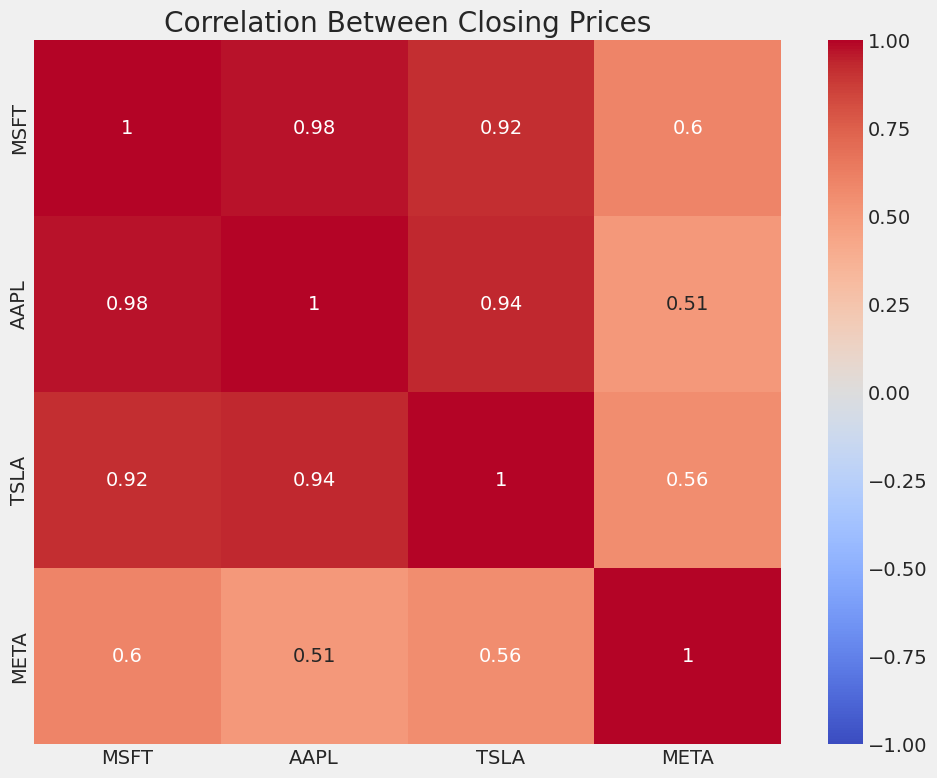

In [7]:
combined_data = pd.DataFrame()
for company, data in company_data.items():
    combined_data[company] = data['Close']

correlation_matrix = combined_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Closing Prices')
plt.tight_layout()
plt.show()

Visualising average stock prices for each company.

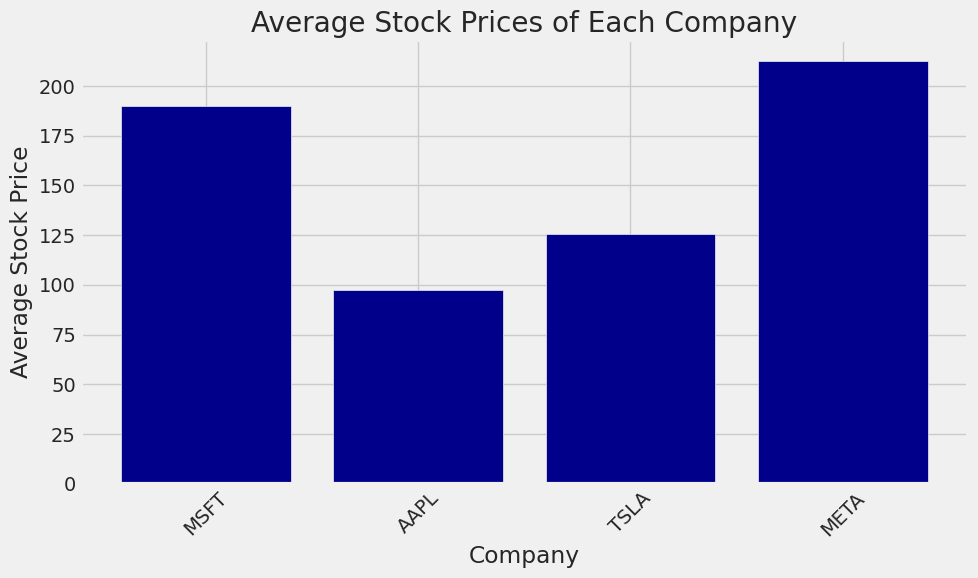

In [8]:
average_prices = {}
for company, data in company_data.items():
    avg_price = data['Close'].mean()
    average_prices[company] = avg_price

plt.figure(figsize=(10, 6))
plt.bar(average_prices.keys(), average_prices.values(), color='darkblue')
plt.title('Average Stock Prices of Each Company')
plt.xlabel('Company')
plt.ylabel('Average Stock Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


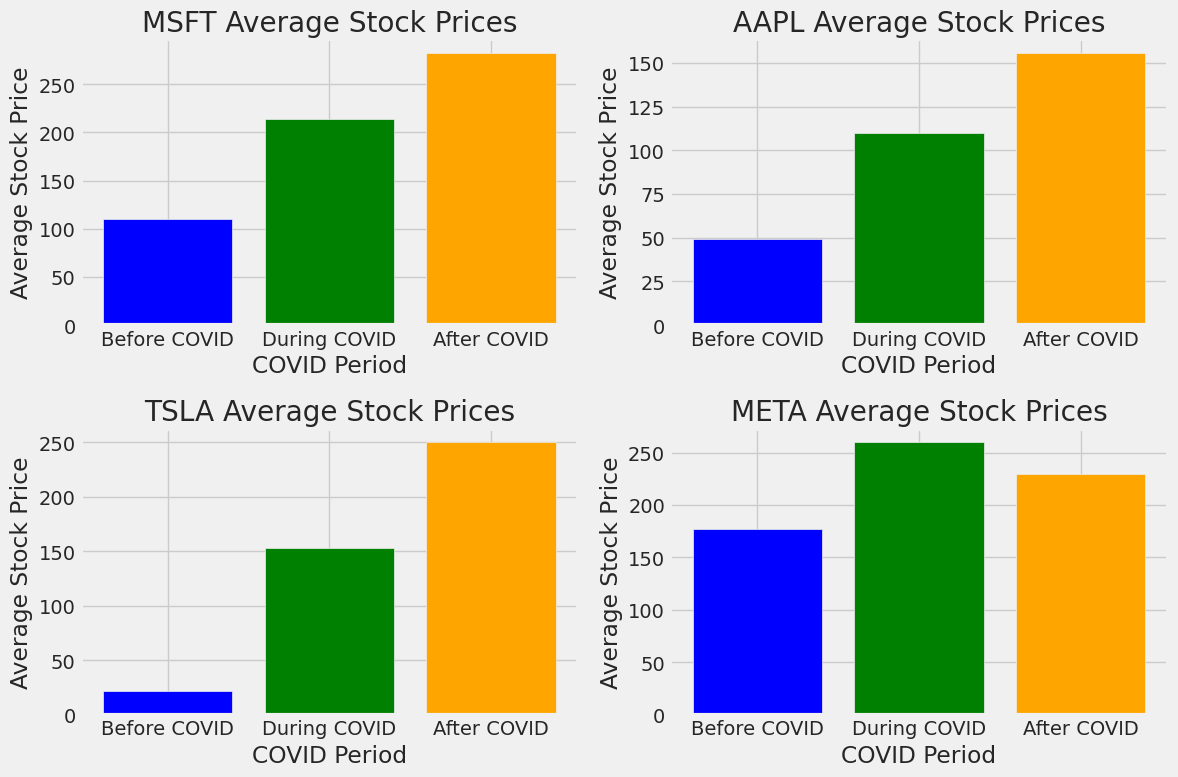

In [9]:
plt.figure(figsize=(12, 8))

for idx, (company, data) in enumerate(company_data.items()):
    data['Date'] = pd.to_datetime(data['Date'])
    data['COVID_Category'] = pd.cut(data['Date'],
        bins=[pd.to_datetime(before_covid), pd.to_datetime(during_covid_start), pd.to_datetime(during_covid_end), pd.to_datetime(data['Date'].max())],
        labels=['Before COVID', 'During COVID', 'After COVID'])

    avg_prices = []
    for category in ['Before COVID', 'During COVID', 'After COVID']:
        avg_price = data[data['COVID_Category'] == category]['Close'].mean()
        avg_prices.append(avg_price)

    plt.subplot(2, 2, idx + 1)
    plt.bar(['Before COVID', 'During COVID', 'After COVID'], avg_prices, color=['blue', 'green', 'orange'])
    plt.title(f'{company} Average Stock Prices')
    plt.xlabel('COVID Period')
    plt.ylabel('Average Stock Price')

plt.tight_layout()
plt.show()

Visualising highest and lowest stock prices for each company during each period

In [10]:
for company, data in company_data.items():
    data['Date'] = pd.to_datetime(data['Date'])
    data['COVID_Category'] = pd.cut(data['Date'],
        bins=[pd.to_datetime(before_covid), pd.to_datetime(during_covid_start), pd.to_datetime(during_covid_end), pd.to_datetime(data['Date'].max())],
        labels=['Before COVID', 'During COVID', 'After COVID'])

    grouped = data.groupby('COVID_Category')['Close'].agg([max, min])
    print(f'{company} Stock Prices:')
    print(grouped)
    print('\n')

MSFT Stock Prices:
                       max         min
COVID_Category                        
Before COVID    188.699997   68.169998
During COVID    271.399994  135.419998
After COVID     348.100006  214.250000


AAPL Stock Prices:
                       max         min
COVID_Category                        
Before COVID     81.800003   35.547501
During COVID    143.160004   56.092499
After COVID     189.589996  125.019997


TSLA Stock Prices:
                       max         min
COVID_Category                        
Before COVID     61.161331   11.931333
During COVID    294.363342   24.081333
After COVID     409.970001  108.099998


META Stock Prices:
                       max         min
COVID_Category                        
Before COVID    223.229996  124.059998
During COVID    355.640015  146.009995
After COVID     382.179993   88.910004




Visualising average daily return of each company

In [11]:
for company, data in company_data.items():
    data['Daily_Return'] = data['Close'].pct_change()  # daily return
    avg_daily_return = data['Daily_Return'].mean()  # average daily return
    print(f'{company} Average Daily Return: {avg_daily_return:.4f}')

MSFT Average Daily Return: 0.0012
AAPL Average Daily Return: 0.0012
TSLA Average Daily Return: 0.0024
META Average Daily Return: 0.0008


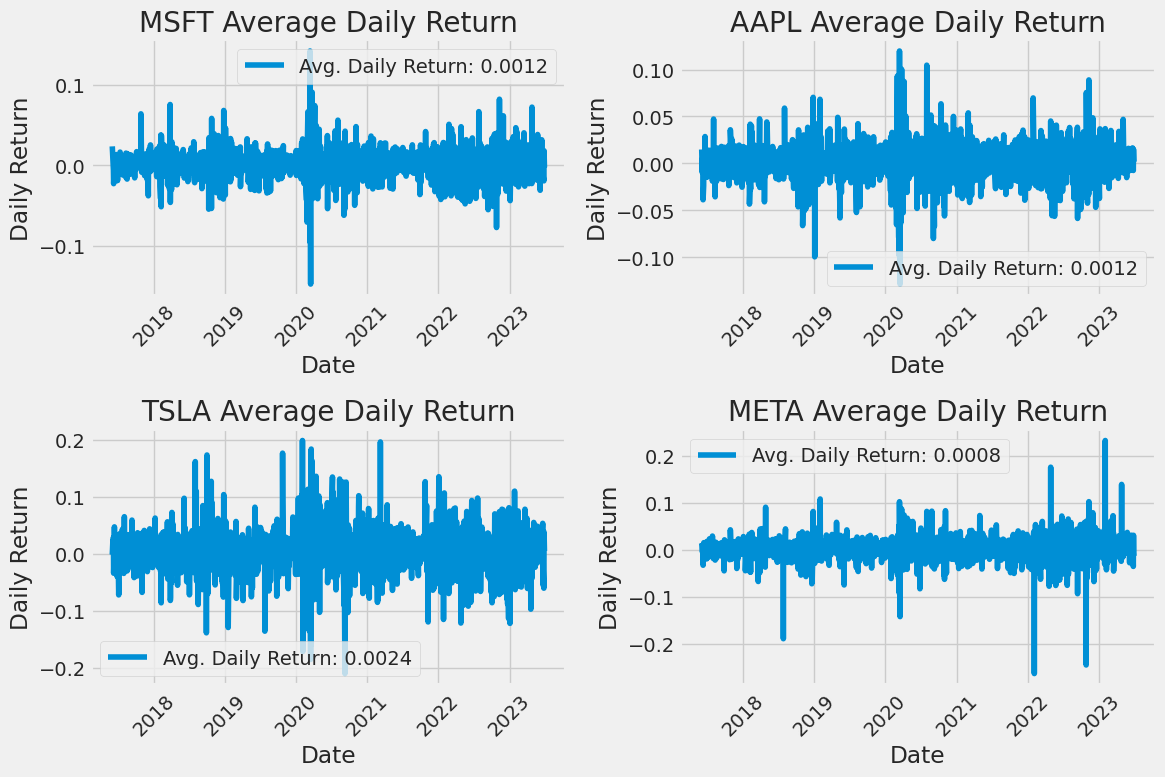

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.flatten()
for idx, (company, data) in enumerate(company_data.items()):
    data['Daily_Return'] = data['Close'].pct_change()
    avg_daily_return = data['Daily_Return'].mean()

    ax = axs[idx]
    ax.plot(data['Date'], data['Daily_Return'], label=f'Avg. Daily Return: {avg_daily_return:.4f}')
    ax.set_title(f'{company} Average Daily Return')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Return')
    ax.legend()
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


 Analyzing and comparing the risk (standard deviation of daily returns) for each company during the COVID-19 period.

In [13]:
risk_data = []
for company, data in company_data.items():
    data['Date'] = pd.to_datetime(data['Date'])
    data['COVID_Category'] = pd.cut(data['Date'],
        bins=[pd.to_datetime(before_covid), pd.to_datetime(during_covid_start), pd.to_datetime(during_covid_end), pd.to_datetime(data['Date'].max())],
        labels=['Before COVID', 'During COVID', 'After COVID'])

    during_covid_data = data[data['COVID_Category'] == 'During COVID']
    during_covid_data['Daily_Return'] = during_covid_data['Close'].pct_change()
    risk = during_covid_data['Daily_Return'].std()
    risk_data.append((company, risk))

risk_data.sort(key=lambda x: x[1])

companies = [company[0] for company in risk_data]
risk_values = [company[1] for company in risk_data]

<ipython-input-13-7fccfca28fda>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  during_covid_data['Daily_Return'] = during_covid_data['Close'].pct_change()
<ipython-input-13-7fccfca28fda>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  during_covid_data['Daily_Return'] = during_covid_data['Close'].pct_change()
<ipython-input-13-7fccfca28fda>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

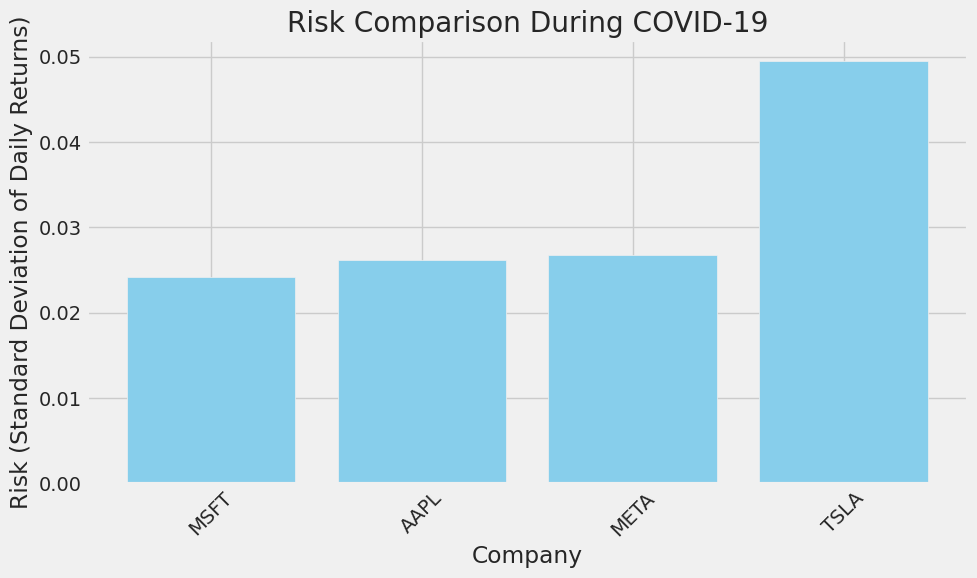

The company that faced less risk During COVID-19 is: MSFT


In [14]:
plt.figure(figsize=(10, 6))
plt.bar(companies, risk_values, color='skyblue')
plt.title('Risk Comparison During COVID-19')
plt.xlabel('Company')
plt.ylabel('Risk (Standard Deviation of Daily Returns)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

least_risk_company = risk_data[0]
print(f"The company that faced less risk During COVID-19 is: {least_risk_company[0]}")

 Analyzing and comparing the risk (standard deviation of daily returns) for each company after the COVID-19 period.

In [15]:
risk_data = []
for company, data in company_data.items():
    data['Date'] = pd.to_datetime(data['Date'])
    data['COVID_Category'] = pd.cut(data['Date'],
        bins=[pd.to_datetime(before_covid), pd.to_datetime(during_covid_start), pd.to_datetime(during_covid_end), pd.to_datetime(data['Date'].max())],
        labels=['Before COVID', 'During COVID', 'After COVID'])

    after_covid_data = data[data['COVID_Category'] == 'After COVID']
    after_covid_data['Daily_Return'] = after_covid_data['Close'].pct_change()
    risk = after_covid_data['Daily_Return'].std()
    risk_data.append((company, risk))

risk_data.sort(key=lambda x: x[1])

companies = [company[0] for company in risk_data]
risk_values = [company[1] for company in risk_data]

<ipython-input-15-21dd61976a36>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_covid_data['Daily_Return'] = after_covid_data['Close'].pct_change()
<ipython-input-15-21dd61976a36>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after_covid_data['Daily_Return'] = after_covid_data['Close'].pct_change()
<ipython-input-15-21dd61976a36>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

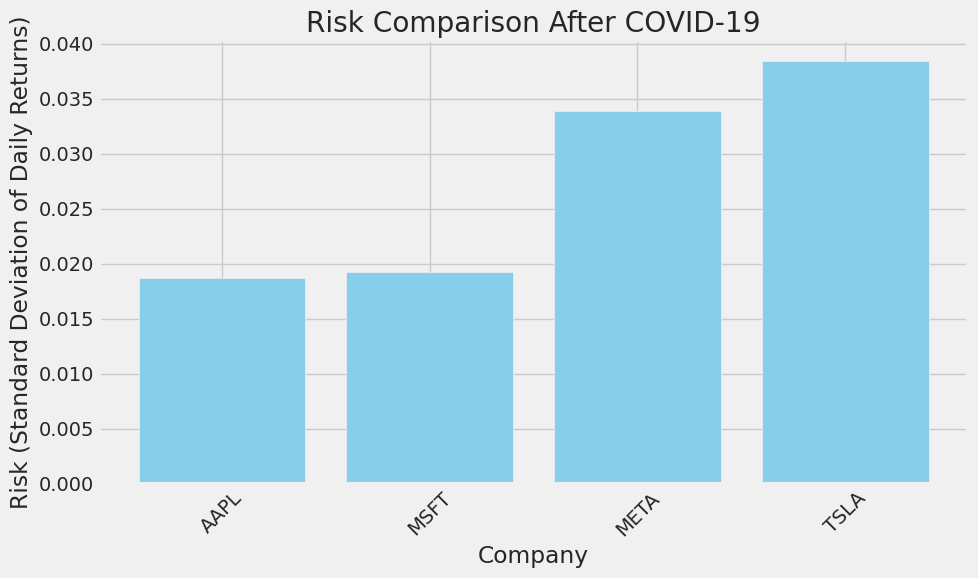

The company that faced less risk After COVID-19 is: AAPL


In [16]:
plt.figure(figsize=(10, 6))
plt.bar(companies, risk_values, color='skyblue')
plt.title('Risk Comparison After COVID-19')
plt.xlabel('Company')
plt.ylabel('Risk (Standard Deviation of Daily Returns)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

least_risk_company = risk_data[0]
print(f"The company that faced less risk After COVID-19 is: {least_risk_company[0]}")

### **Prediction**

**Stock Price Prediction using LSTM**


Importing modules and dataset

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [18]:
data = pd.read_csv('MSFT.csv')
closing_prices = data['Close'].values.reshape(-1, 1)

scaler = MinMaxScaler()
closing_prices_scaled = scaler.fit_transform(closing_prices)

Splitting Data for testing and traning

In [19]:
train_size = int(len(closing_prices_scaled) * 0.8)
train_data = closing_prices_scaled[:train_size]
test_data = closing_prices_scaled[train_size:]

In [20]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [21]:
seq_length = 10
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

Model Creation

In [22]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


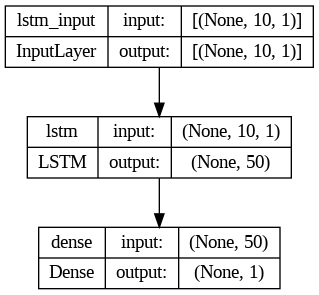

In [23]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

Fitting the model

In [24]:
model.fit(X_train, y_train, epochs=100, batch_size=4)

Epoch 1/100
304/304 [==============================] - 12s 18ms/step - loss: 0.0071
Epoch 2/100
304/304 [==============================] - 7s 22ms/step - loss: 3.9639e-04
Epoch 3/100
304/304 [==============================] - 10s 34ms/step - loss: 3.9693e-04
Epoch 4/100
304/304 [==============================] - 13s 42ms/step - loss: 3.7915e-04
Epoch 5/100
304/304 [==============================] - 8s 27ms/step - loss: 3.5851e-04
Epoch 6/100
304/304 [==============================] - 7s 22ms/step - loss: 3.5199e-04
Epoch 7/100
304/304 [==============================] - 6s 18ms/step - loss: 3.3556e-04
Epoch 8/100
304/304 [==============================] - 7s 22ms/step - loss: 3.1690e-04
Epoch 9/100
304/304 [==============================] - 6s 18ms/step - loss: 2.9127e-04
Epoch 10/100
304/304 [==============================] - 7s 22ms/step - loss: 2.6447e-04
Epoch 11/100
304/304 [==============================] - 6s 18ms/step - loss: 2.8818e-04
Epoch 12/100
304/304 [====================

Prediction and evaluation

In [25]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1,1))

10/10 [==============================] - 0s 3ms/step


In [26]:
test_dates = data['Date'].values[train_size + seq_length:]
comparison_df = pd.DataFrame({'Date': test_dates, 'Actual_Close': y_test_original.flatten(), 'Predicted_Close': y_pred.flatten()})
print(comparison_df)

           Date  Actual_Close  Predicted_Close
0    2022-04-26    270.220001       280.560028
1    2022-04-27    283.220001       271.363739
2    2022-04-28    289.630005       282.201813
3    2022-04-29    277.519989       290.320740
4    2022-05-02    284.470001       278.081207
..          ...           ...              ...
291  2023-06-23    335.019989       339.429840
292  2023-06-26    328.600006       334.663300
293  2023-06-27    334.570007       327.083893
294  2023-06-28    335.850006       334.288361
295  2023-06-29    335.049988       336.084686

[296 rows x 3 columns]


In [27]:
mse = mean_squared_error(y_test_original, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 31.322403308891452
Root Mean Squared Error: 5.596642145866703


In [28]:
mape = mean_absolute_percentage_error(y_test_original, y_pred)
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')


Mean Absolute Percentage Error (MAPE): 0.02%


## **Comparison of Different Models- SVM and Random Forest**

In [29]:
X_train_rf_svm = X_train.reshape(-1, seq_length)
X_test_rf_svm = X_test.reshape(-1, seq_length)
y_train_rf_svm = y_train.flatten()
y_test_rf_svm = y_test.flatten()

In [30]:
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_rf_svm, y_train_rf_svm)

SVR()

In [31]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_rf_svm, y_train_rf_svm)

RandomForestRegressor(random_state=42)

In [32]:
y_pred_svm = svm_model.predict(X_test_rf_svm)
y_pred_rf = rf_model.predict(X_test_rf_svm)

In [33]:
y_pred_svm = scaler.inverse_transform(y_pred_svm.reshape(-1, 1))
y_pred_rf = scaler.inverse_transform(y_pred_rf.reshape(-1, 1))


In [34]:
mse_svm = mean_squared_error(y_test_original, y_pred_svm)
mse_rf = mean_squared_error(y_test_original, y_pred_rf)

In [35]:
print("Mean Squared Error of SVM:", mse_svm)
print("Mean Squared Error of Random Forest:", mse_rf)
print("Mean Squared Error of LSTM:", mse)

Mean Squared Error of SVM: 254.0594178463397
Mean Squared Error of Random Forest: 43.940672731239225
Mean Squared Error of LSTM: 31.322403308891452


In [36]:
rmse_svm = np.sqrt(mean_squared_error(y_test_original, y_pred_svm))
rmse_rf = np.sqrt(mean_squared_error(y_test_original, y_pred_rf))


In [37]:
print(f"RMSE for SVM: {rmse_svm}")
print(f"RMSE for Random Forest: {rmse_rf}")
print(f"RMSE for LSTM: {rmse}")

RMSE for SVM: 15.939241445135954
RMSE for Random Forest: 6.628776111111253
RMSE for LSTM: 5.596642145866703


In [38]:
mape_svm = mean_absolute_percentage_error(y_test_original, y_pred_svm)
mape_rf = mean_absolute_percentage_error(y_test_original, y_pred_rf)
mape = mean_absolute_percentage_error(y_test_original, y_pred)


In [39]:
print(f'Mean Absolute Percentage Error (MAPE) of SVM: {mape_svm:.2f}%')
print(f'Mean Absolute Percentage Error (MAPE) of Random Forest: {mape_rf:.2f}%')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

Mean Absolute Percentage Error (MAPE) of SVM: 0.05%
Mean Absolute Percentage Error (MAPE) of Random Forest: 0.02%
Mean Absolute Percentage Error (MAPE): 0.02%


**Comparison graph of Different Models**

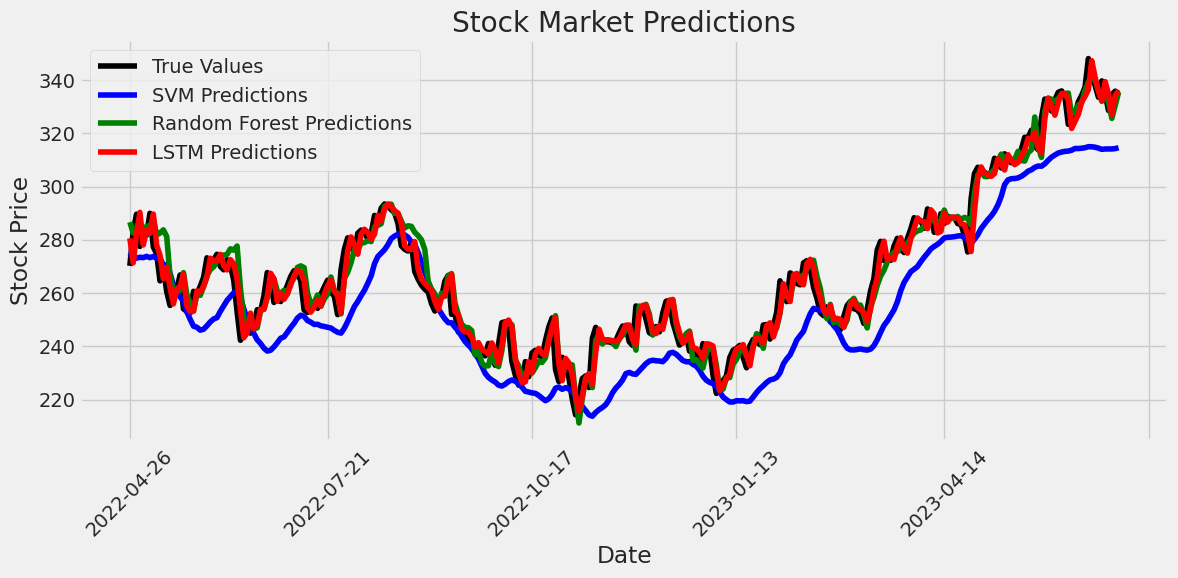

In [40]:
import matplotlib.dates as mdates

# Plot the predictions with a subset of dates as the x-axis labels
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_test_original, label='True Values', color='black')
plt.plot(test_dates, y_pred_svm, label='SVM Predictions', color='blue')
plt.plot(test_dates, y_pred_rf, label='Random Forest Predictions', color='green')
plt.plot(test_dates, y_pred, label='LSTM Predictions', color='red')
plt.title('Stock Market Predictions')
plt.xlabel('Date')  # Set x-axis label as 'Date'
plt.ylabel('Stock Price')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Display every 2 months
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()


In [41]:
results_df = pd.DataFrame({
    'Actual': y_test_original.flatten(),
    'SVM Predicted': y_pred_svm.flatten(),
    'Random Forest Predicted': y_pred_rf.flatten(),
    'LSTM Predicted': y_pred.flatten()
})
print(results_df)

         Actual  SVM Predicted  Random Forest Predicted  LSTM Predicted
0    270.220001     274.970839               286.654102      280.560028
1    283.220001     272.903840               282.550704      271.363739
2    289.630005     273.127818               284.280405      282.201813
3    277.519989     273.454014               287.535496      290.320740
4    284.470001     273.306936               280.915203      278.081207
..          ...            ...                      ...             ...
291  335.019989     314.130424               334.495199      339.429840
292  328.600006     314.141031               331.682701      334.663300
293  334.570007     314.140318               325.625601      327.083893
294  335.850006     314.277286               330.568498      334.288361
295  335.049988     314.600428               335.362100      336.084686

[296 rows x 4 columns]


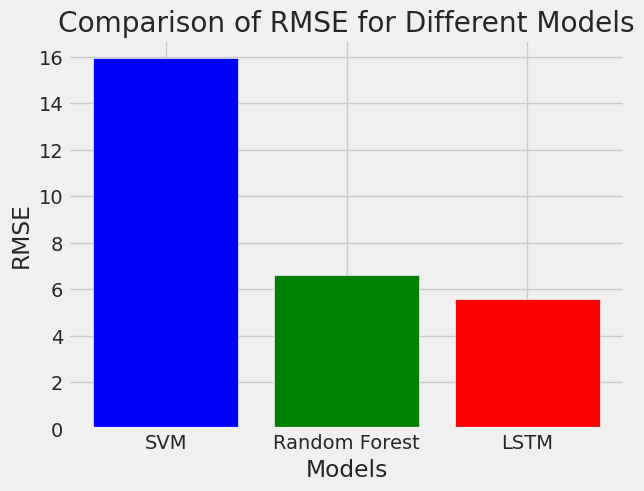

In [42]:
models = ['SVM', 'Random Forest', 'LSTM']
rmse_values = [rmse_svm, rmse_rf, rmse]

plt.bar(models, rmse_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models')
plt.show()

 Plotting the graph of prediction using LSTM  

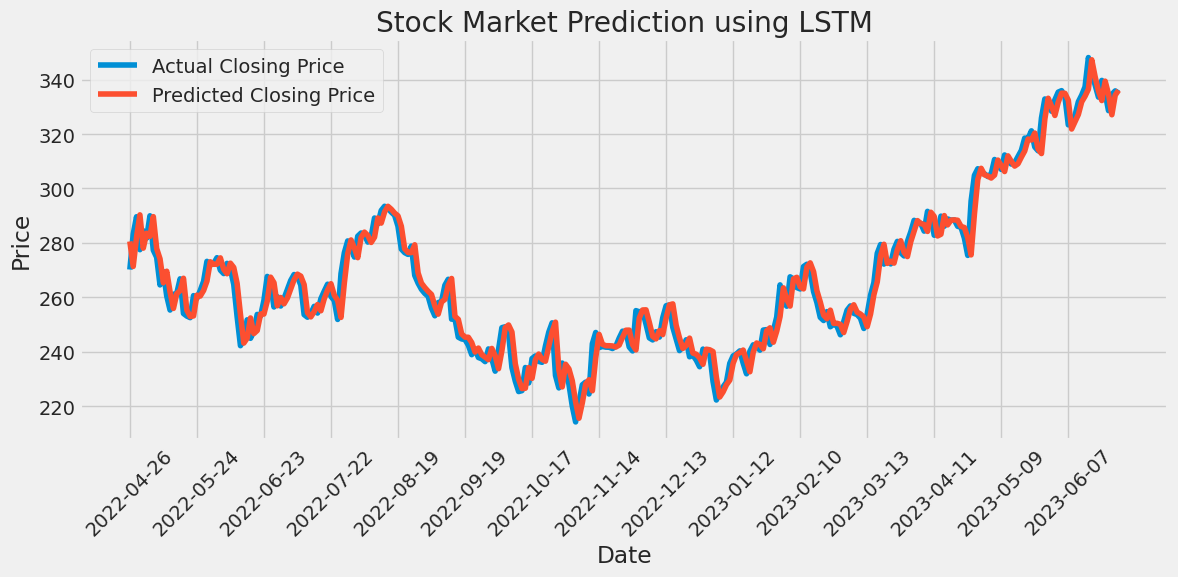

In [43]:
x_values = range(len(test_dates))

plt.figure(figsize=(12, 6))
plt.plot(x_values, y_test_original, label='Actual Closing Price')
plt.plot(x_values, y_pred, label='Predicted Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Market Prediction using LSTM')
plt.legend()

plt.xticks(x_values[::20], test_dates[::20], rotation=45)
plt.tight_layout()

plt.show()

Mounting Google Drive and Saving model

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
model.save('/content/drive/My Drive/model_final.h5')


plotting the prediction graph of Apple

In [46]:
close_prices_aapl = aapl_data['Close'].values
scaler_aapl = MinMaxScaler()
close_prices_scaled_aapl = scaler_aapl.fit_transform(close_prices_aapl.reshape(-1, 1))

X_aapl, y_aapl = create_sequences(close_prices_scaled_aapl, seq_length)

In [47]:
y_pred_scaled_aapl = model.predict(X_aapl)
y_pred_aapl = scaler_aapl.inverse_transform(y_pred_scaled_aapl)

48/48 [==============================] - 0s 5ms/step


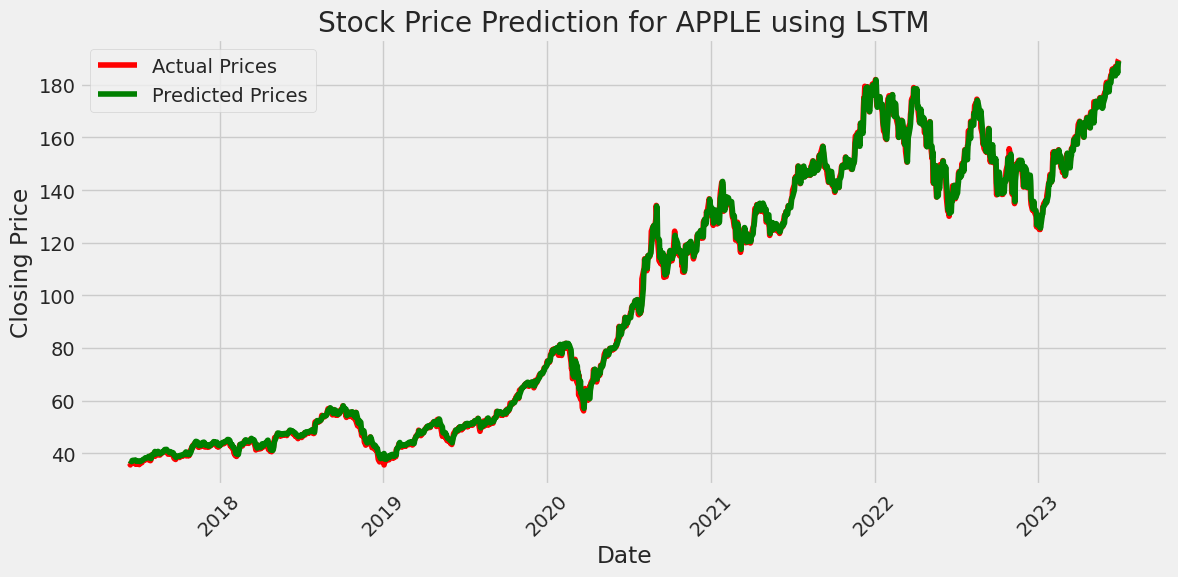

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(aapl_data['Date'][seq_length:], close_prices_aapl[seq_length:], label='Actual Prices', color='red')
plt.plot(aapl_data['Date'][seq_length:], y_pred_aapl, label='Predicted Prices', color='green')
plt.title('Stock Price Prediction for APPLE using LSTM')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


### **Dashboard**

In [49]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 79.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 28.3 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.7
    Uninstalling Werkzeug-2.3.7:
      Successfully uninstalled Werkzeug-2.3.7


In [50]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
from tensorflow.keras.models import load_model


<ipython-input-50-de64617386d4>:2: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-50-de64617386d4>:3: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [52]:
model = load_model('/content/drive/MyDrive/model_final.h5')
data = pd.read_csv('MSFT.csv')


In [53]:
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

10/10 [==============================] - 0s 5ms/step


In [54]:
comparison_df = pd.DataFrame({'Date': test_dates, 'Actual_Close': y_test_original.flatten(), 'Predicted_Close': y_pred.flatten()})

In [55]:
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Stock Market Prediction Dashboard"),
    dcc.Graph(
        id='stock-prediction-plot',
        figure={
            'data': [
                {'x': comparison_df['Date'], 'y': comparison_df['Actual_Close'], 'name': 'Actual Closing Price', 'type': 'line'},
                {'x': comparison_df['Date'], 'y': comparison_df['Predicted_Close'], 'name': 'Predicted Closing Price', 'type': 'line'},
            ],
            'layout': {
                'title': 'Actual vs. Predicted Closing Prices of Microsoft',
                'xaxis': {'title': 'Date'},
                'yaxis': {'title': 'Price'}
            }
        }
    ),
])

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>